In [1]:
import os
print("Current dir: "+os.getcwd())
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Model
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import scikitplot as skplt
import PIL
from numpy import asarray
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

Current dir: C:\Users\user


Using TensorFlow backend.


In [2]:
from keras import layers
from keras.models import Model
from keras.regularizers import l1
in_shape=(227,227,3)
n_classes=2
opt='sgd'
in_layer = layers.Input(in_shape)
conv1 = layers.Conv2D(96, 11, strides=4, activation='relu')(in_layer)
pool1 = layers.MaxPool2D(3, 2)(conv1)
conv2 = layers.Conv2D(256, 5, strides=1, padding='same', activation='relu')(pool1)
pool2 = layers.MaxPool2D(3, 2)(conv2)
conv3 = layers.Conv2D(384, 3, strides=1, padding='same', activation='relu')(pool2)
conv4 = layers.Conv2D(256, 3, strides=1, padding='same', activation='relu')(conv3)
pool3 = layers.MaxPool2D(3, 2)(conv4)
flattened = layers.Flatten()(pool3)
dense1 = layers.Dense(4096, activation='relu')(flattened)
drop1 = layers.Dropout(0.5)(dense1)
dense2 = layers.Dense(4096, activation='relu')(drop1)
drop2 = layers.Dropout(0.5)(dense2)
preds = layers.Dense(n_classes, activation='softmax')(drop2)
model = Model(in_layer, preds)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [3]:
import os
os.chdir(r'C:\Users\user\Downloads\Dataset\Train Images')
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.80):
            print('cancelling since validation accuracy has been reached to 80%')
            self.model.stop_training=True
callbacks_3=myCallback()   
os.chdir(r"C:\Users\user\Downloads\Dataset\Train Images")
path_train=os.getcwd()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation Images")
path_validation=os.getcwd()
train_gen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2
                            ,fill_mode='nearest')
train_data=train_gen.flow_from_directory(path_train,target_size=(227,227),batch_size=50)
validation_gen=ImageDataGenerator(rescale=1/255)
validation_data=validation_gen.flow_from_directory(path_validation,target_size=(227,227),batch_size=10)
model.fit_generator(train_data,epochs=10,validation_data=validation_data,callbacks=[callbacks_3])
model.save("model1.h5")

Found 10998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
220/220 [==============================] - 339s 2s/step - loss: 0.6589 - accuracy: 0.6177 - val_loss: 0.5207 - val_accuracy: 0.7240
Epoch 2/10
220/220 [==============================] - 320s 1s/step - loss: 0.4516 - accuracy: 0.7942 - val_loss: 0.1406 - val_accuracy: 0.9160
cancelling since validation accuracy has been reached to 80%


# Evaluating Model on Training data

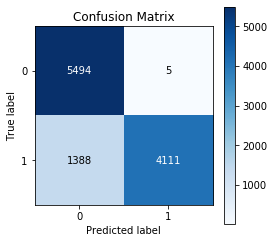

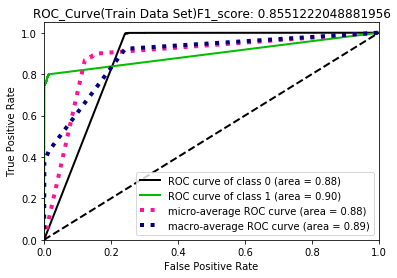

In [7]:

os.chdir(r"C:\Users\user\Downloads\Dataset")
path=os.getcwd()
model=load_model("model1.h5")
train=pd.read_csv("train_.csv")
train_images=train['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\train_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_train=[]
for file in train_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_train.append(model.predict(img))
y_prob_np_train=np.array(y_prob_train)
y_prob_np_train=y_prob_np_train.reshape(10998,2)
y_pred_np_train=y_prob_np_train.argmax(axis=1)
train_labels=train['Class']
y_train=np.array(train_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train,y_pred_np_train,figsize=(4,4))
skplt.metrics.plot_roc(y_train,y_prob_np_train,title="ROC_Curve(Train Data Set)F1_score: "+str(f1_score(y_train,y_pred_np_train)))

# Evaluating Model on Validation data

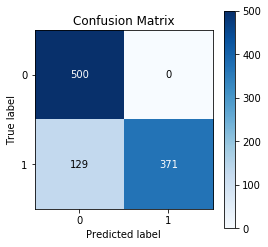

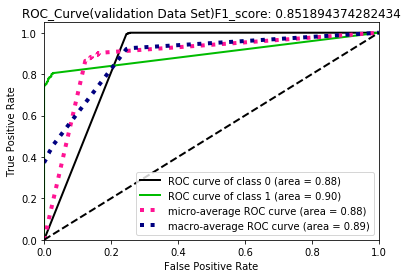

In [10]:
os.chdir(r"C:\Users\user\Downloads\Dataset")
validation=pd.read_csv("validation_.csv")
validation_images=validation['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_validation=[]
for file in validation_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_validation.append(model.predict(img))
y_prob_np_validation=np.array(y_prob_validation)
y_prob_np_validation=y_prob_np_validation.reshape(1000,2)
y_pred_np_validation=y_prob_np_validation.argmax(axis=1)
validation_labels=validation['Class']
y_validation=np.array(validation_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_validation,y_pred_np_validation,figsize=(4,4))
skplt.metrics.plot_roc(y_validation,y_prob_np_validation,title="ROC_Curve(validation Data Set)F1_score: "+str(f1_score(y_validation,y_pred_np_validation)))
skplt.metrics.plot_precision_recall(y_validation,y_preb_np_validation)

# Attempt 2: Let's Train our model until the validation acc reaches 95%

In [15]:
import os
os.chdir(r'C:\Users\user\Downloads\Dataset\Train Images')
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.95):
            print('cancelling since validation accuracy has been reached to 95%')
            self.model.stop_training=True
callbacks_3=myCallback()   
os.chdir(r"C:\Users\user\Downloads\Dataset\Train Images")
path_train=os.getcwd()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation Images")
path_validation=os.getcwd()
train_gen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2
                            ,fill_mode='nearest')
train_data=train_gen.flow_from_directory(path_train,target_size=(227,227),batch_size=50)
validation_gen=ImageDataGenerator(rescale=1/255)
validation_data=validation_gen.flow_from_directory(path_validation,target_size=(227,227),batch_size=10)
model.fit_generator(train_data,epochs=10,validation_data=validation_data,callbacks=[callbacks_3])
os.chdir(r'C:\Users\user\Downloads\Dataset')
model.save("model2.h5")

Found 10998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
220/220 [==============================] - 346s 2s/step - loss: 0.2525 - accuracy: 0.9056 - val_loss: 0.0920 - val_accuracy: 0.9740
cancelling since validation accuracy has been reached to 95%


# Evaluating Model on Training data

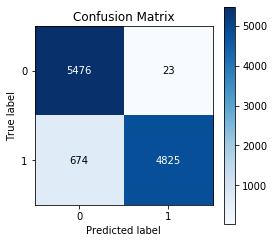

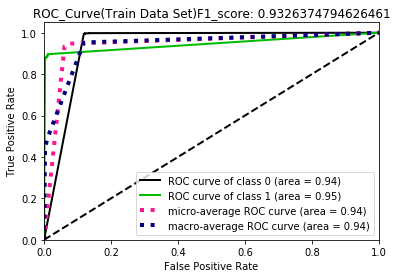

In [16]:

os.chdir(r"C:\Users\user\Downloads\Dataset")
path=os.getcwd()
model=load_model("model2.h5")
train=pd.read_csv("train_.csv")
train_images=train['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\train_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_train=[]
for file in train_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_train.append(model.predict(img))
y_prob_np_train=np.array(y_prob_train)
y_prob_np_train=y_prob_np_train.reshape(10998,2)
y_pred_np_train=y_prob_np_train.argmax(axis=1)
train_labels=train['Class']
y_train=np.array(train_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train,y_pred_np_train,figsize=(4,4))
skplt.metrics.plot_roc(y_train,y_prob_np_train,title="ROC_Curve(Train Data Set)F1_score: "+str(f1_score(y_train,y_pred_np_train)))

# Evaluating Model on Validation data Set

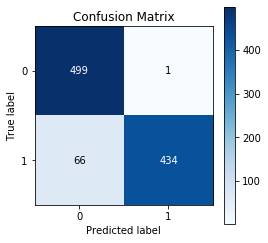

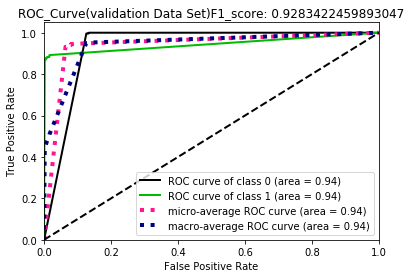

In [19]:
os.chdir(r"C:\Users\user\Downloads\Dataset")
validation=pd.read_csv("validation_.csv")
validation_images=validation['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_validation=[]
for file in validation_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_validation.append(model.predict(img))
y_prob_np_validation=np.array(y_prob_validation)
y_prob_np_validation=y_prob_np_validation.reshape(1000,2)
y_pred_np_validation=y_prob_np_validation.argmax(axis=1)
validation_labels=validation['Class']
y_validation=np.array(validation_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_validation,y_pred_np_validation,figsize=(4,4))
skplt.metrics.plot_roc(y_validation,y_prob_np_validation,title="ROC_Curve(validation Data Set)F1_score: "+str(f1_score(y_validation,y_pred_np_validation)))


# Attempt 3: Let's Train our model until the validation acc reaches 99%

In [20]:
import os
os.chdir(r'C:\Users\user\Downloads\Dataset\Train Images')
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.9899):
            print('cancelling since validation accuracy has been reached to 98.99%')
            self.model.stop_training=True
callbacks_3=myCallback()   
os.chdir(r"C:\Users\user\Downloads\Dataset\Train Images")
path_train=os.getcwd()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation Images")
path_validation=os.getcwd()
train_gen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.3,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2
                            ,fill_mode='nearest')
train_data=train_gen.flow_from_directory(path_train,target_size=(227,227),batch_size=50)
validation_gen=ImageDataGenerator(rescale=1/255)
validation_data=validation_gen.flow_from_directory(path_validation,target_size=(227,227),batch_size=10)
model.fit_generator(train_data,epochs=10,validation_data=validation_data,callbacks=[callbacks_3])
os.chdir(r'C:\Users\user\Downloads\Dataset')
model.save("model3.h5")

Found 10998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
220/220 [==============================] - 370s 2s/step - loss: 0.1745 - accuracy: 0.9370 - val_loss: 0.1146 - val_accuracy: 0.9850
Epoch 2/10
220/220 [==============================] - 219s 994ms/step - loss: 0.1163 - accuracy: 0.9558 - val_loss: 0.0785 - val_accuracy: 0.9710
Epoch 3/10
220/220 [==============================] - 176s 802ms/step - loss: 0.0934 - accuracy: 0.9638 - val_loss: 0.0102 - val_accuracy: 0.9260
Epoch 4/10
220/220 [==============================] - 164s 747ms/step - loss: 0.0953 - accuracy: 0.9646 - val_loss: 0.0034 - val_accuracy: 0.9920
cancelling since validation accuracy has been reached to 98.99%


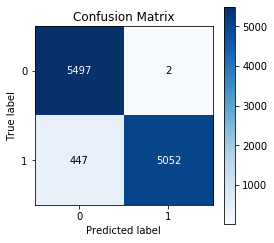

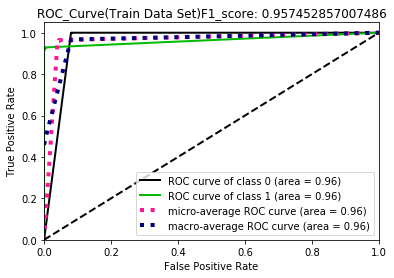

In [21]:

os.chdir(r"C:\Users\user\Downloads\Dataset")
path=os.getcwd()
model=load_model("model3.h5")
train=pd.read_csv("train_.csv")
train_images=train['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\train_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_train=[]
for file in train_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_train.append(model.predict(img))
y_prob_np_train=np.array(y_prob_train)
y_prob_np_train=y_prob_np_train.reshape(10998,2)
y_pred_np_train=y_prob_np_train.argmax(axis=1)
train_labels=train['Class']
y_train=np.array(train_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_train,y_pred_np_train,figsize=(4,4))
skplt.metrics.plot_roc(y_train,y_prob_np_train,title="ROC_Curve(Train Data Set)F1_score: "+str(f1_score(y_train,y_pred_np_train)))

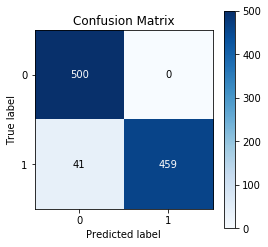

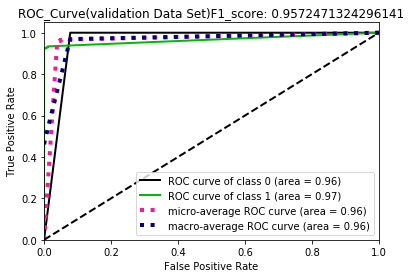

In [22]:
os.chdir(r"C:\Users\user\Downloads\Dataset")
validation=pd.read_csv("validation_.csv")
validation_images=validation['Image_File'].to_list()
os.chdir(r"C:\Users\user\Downloads\Dataset\validation_images")
path=os.getcwd()
from keras.preprocessing import image
y_prob_validation=[]
for file in validation_images:
    path_file=os.path.join(path,file)
    img=image.load_img(path_file,target_size=(227,227))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    y_prob_validation.append(model.predict(img))
y_prob_np_validation=np.array(y_prob_validation)
y_prob_np_validation=y_prob_np_validation.reshape(1000,2)
y_pred_np_validation=y_prob_np_validation.argmax(axis=1)
validation_labels=validation['Class']
y_validation=np.array(validation_labels)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_validation,y_pred_np_validation,figsize=(4,4))
skplt.metrics.plot_roc(y_validation,y_prob_np_validation,title="ROC_Curve(validation Data Set)F1_score: "+str(f1_score(y_validation,y_pred_np_validation)))
